# Полиномиальная регрессия с серией графиков

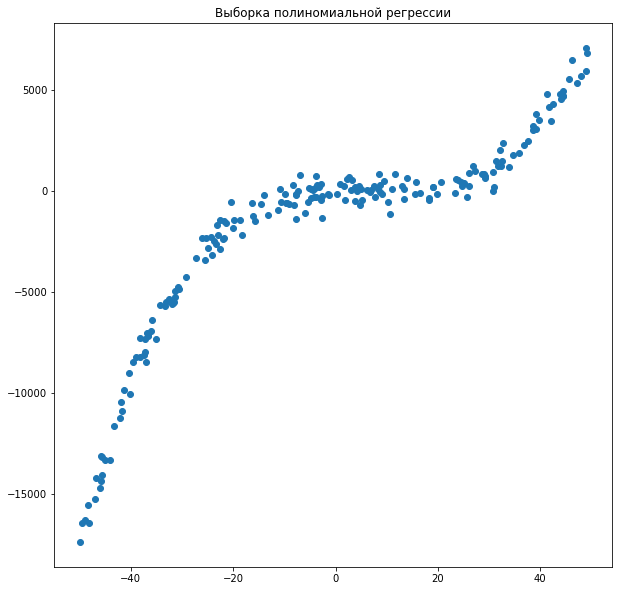

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from time import time

TOTAL = 200

def generate() -> (np.array, np.array):
    X, Y = [], []
    for i in range(TOTAL):
        x = np.random.uniform(-50, 50)
        y = -2*x - 2*(x)**2 + 0.1*(x)**3 - 10 + np.random.normal(0, 500)
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

X, Y = generate()
X, Y = X.reshape(-1, 1), Y.reshape(-1, 1)

plt.figure(figsize=(10, 10))
plt.title('Выборка полиномиальной регрессии')
plt.scatter(X, Y)
plt.show()

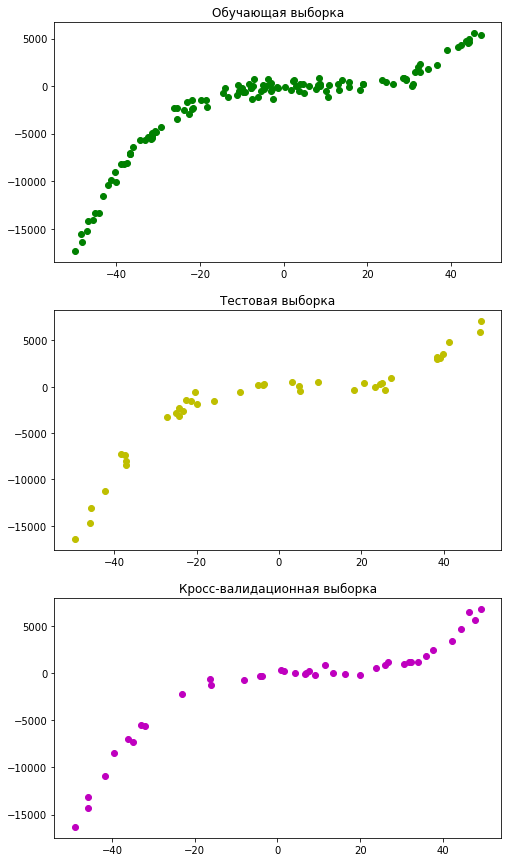

In [2]:
X_train, X_interval, Y_train, Y_interval = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(X_interval, Y_interval, test_size=0.5)

# Настройка размеров подложки
plt.figure(figsize=(8, 15))

# Вывод графиков
plt.subplot(3, 1, 1)
plt.title('Обучающая выборка')
plt.plot(X_train, Y_train, 'go')

plt.subplot(3, 1, 2)
plt.title('Тестовая выборка')
plt.plot(X_test, Y_test, 'yo')

plt.subplot(3, 1, 3)
plt.title('Кросс-валидационная выборка')
plt.plot(X_val, Y_val, 'mo')

plt.show()

[[ 0.28833997]
 [ 0.51757761]
 [-1.72370816]
 [ 0.10100249]]


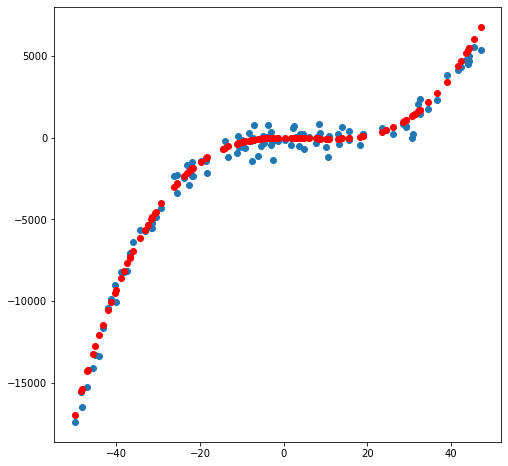

poly_regression in 0.164090 seconds


In [3]:
alpha = 0.0000000004  # Скорость обучения
m = TOTAL  # Размер батча
iteration = 10000

def plot_poly_regression(x, y):  
    A = np.c_[np.ones((x.shape[0], 1)), x, x**2, x**3]
    theta = np.random.rand(A.shape[1], 1)
    lamda = 0.8
    for i in range(iteration):
        gradients = 1 / m * A.T.dot(A.dot(theta) - y) + (lamda/m) * theta 
        theta -= alpha * gradients
       
    print(theta)
    Y_prediction = A.dot(theta)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(x, Y_prediction, 'ro')
    plt.show()
    
def poly_regression(x, y):  
    A = np.c_[np.ones((x.shape[0], 1)), x, x**2, x**3]
    theta = np.random.rand(A.shape[1], 1)
    lamda = 0.8
    for i in range(iteration):
        gradients = 1 / m * A.T.dot(A.dot(theta) - y) + (lamda/m) * theta 
        theta -= alpha * gradients
        
    Y_prediction = A.dot(theta)
    return Y_prediction

time_start = time()
plot_poly_regression(X_train, Y_train)
print("poly_regression in %f seconds" % (time() - time_start))

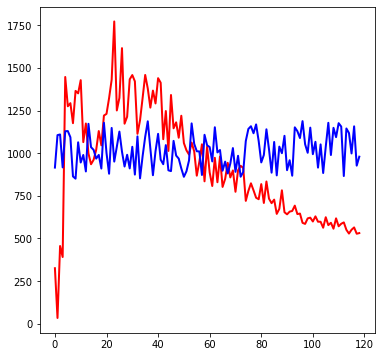

In [4]:
def test_poly_regression():
    train_errors, val_errors = [], []
    
    for i in range (1, len(X_train)) :
        y_train_predict = poly_regression(X_train[:i], Y_train[:i])
        train_errors.append(mean_squared_error(y_train_predict, Y_train[:i]))
        y_val_predict = poly_regression(X_val, Y_val)
        val_errors.append(mean_squared_error(y_val_predict , Y_val))
    plt.figure(figsize=(6, 6))
    plt.plot(np.sqrt(train_errors), "r-" , linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    
test_poly_regression()

### На графие выше приведены кривые обучения для полиномиальной модели